In [36]:
import numpy as np
import matplotlib.pyplot as plt

Since our goal is to model a sequence of handwriting strokes, we need a bivariate gaussian mixture model to capture the joint distribution of coordinates in 2d space.  We've implemented a bivariate mixture density network in `mixture_density_network_2d.py`.  We test our implementation on a vector field, where the inputs are two dimensional `(x, y)` coordinates and the outputs are two dimensional `(u, v)` vectors.

In [24]:
def f(x, y):
    u = np.sin(2*np.pi*y)
    v = np.sin(2*np.pi*x)
    return u, v

In [25]:
def sample_function(f, num_samples, random=False, as_matrix=False):
    if not random:
        x, y = np.meshgrid(
            np.linspace(-1, 1, num_samples),
            np.linspace(-1, 1, num_samples)
        )
    else:
        x, y = np.meshgrid(
            np.sort(np.random.uniform(low=-1.2, high=1.2, size=num_samples)),
            np.sort(np.random.uniform(low=-1.2, high=1.2, size=num_samples))
        )
    u, v = f(x, y)

    if as_matrix:
        data = np.vstack([x, y, u, v]).reshape(4, -1).T
        return data[:, :2], data[:, 2:]
    else:
        return x, y, u, v

In [26]:
def plot_vector_field(x, y, u, v):
    plt.figure(figsize=(6, 6))
    plt.quiver(x, y, u, v, width=.002, headwidth=2)
    plt.show()

An example vector field given by the equation $u = sin(2\pi y)$ and $v = sin(2 \pi x)$ is shown below. We train our network to learn this function. 

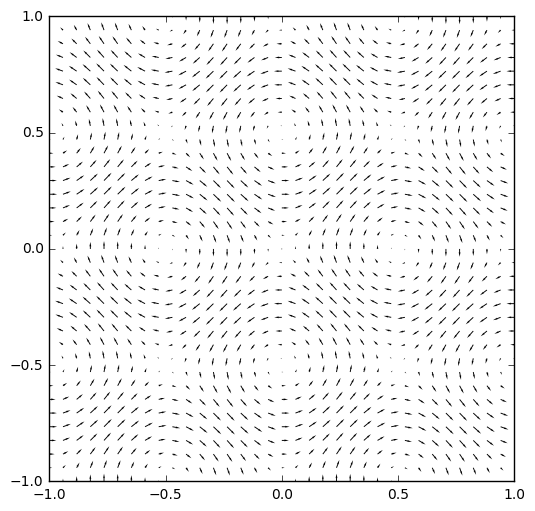

In [27]:
x, y, u, v = sample_function(f, 35, random=False)
plot_vector_field(x, y, u, v)

In [33]:
from mixture_density_network_2d import MDN

mdn = MDN(
    num_mixture_components=1, 
    num_training_steps=25000, 
    batch_size=512, 
    hidden_units=64
)

X, Y = sample_function(f, 200, random=True, as_matrix=True)
mdn.fit(X, Y)

The network correctly learns the function as shown below

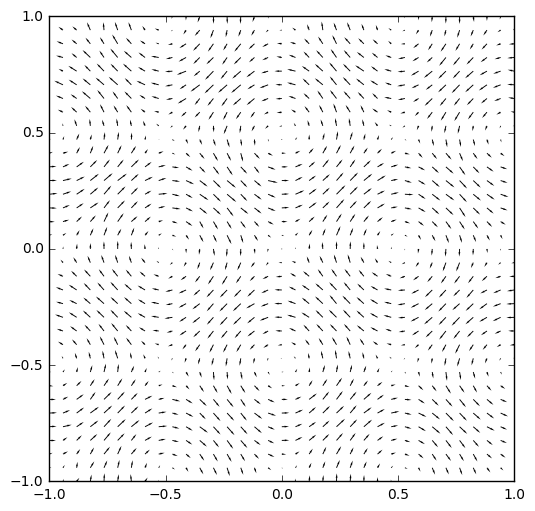

In [35]:
x_test, _ = sample_function(f, 35, random=False, as_matrix=True)
y_pred = mdn.predict(x_test)

x, y, u, v = x_test[:, 0], x_test[:, 1], y_pred[:, 0], y_pred[:, 1]
plot_vector_field(x, y, u, v)